### Name: Chirantha Kurukulasuriya
### Index Number: 190337X

### Q1

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

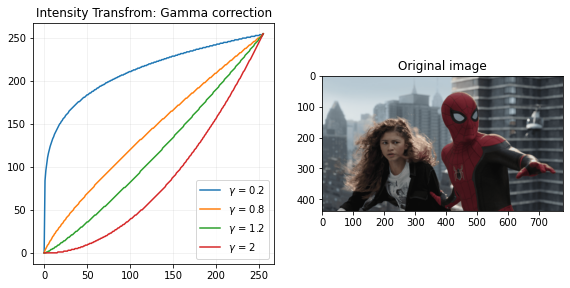

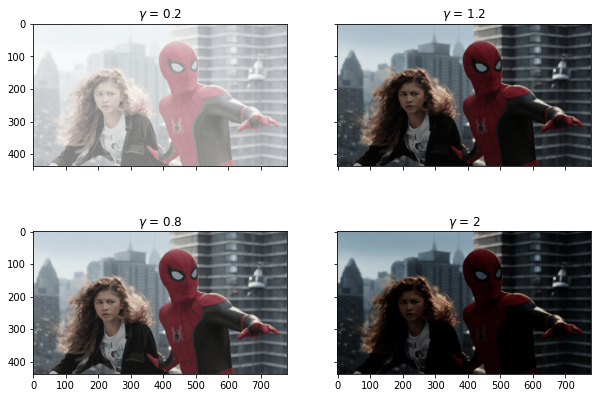

In [90]:
f = cv.imread(r'images/spider.png')
assert f is not None

gamma = [0.2, 0.8, 1.2, 2]

fig1, axs1 = plt.subplots(1,2, figsize=(9.5,7.5))
fig2, axs2 = plt.subplots(2,2, figsize=(10,7), sharex = True, sharey = True)

# original image
im = cv.cvtColor(f, cv.COLOR_BGR2RGB)
axs1[1].imshow(im)
#axs1[1].axis('off')
axs1[1].set_title('Original image')

for i in range(len(gamma)):
    t = np.array([(p/255)**gamma[i]*255 for p in range(0,256)], dtype = np.uint8)
    g = cv.LUT(f, t)

    # gamma corrections plotted
    axs1[0].plot(t, label = '$\gamma$ = '+ str(gamma[i]))
    
    # results plotted
    g_rgb = cv.cvtColor(g, cv.COLOR_BGR2RGB)
    axs2[i%2][i//2].imshow(g_rgb)
    #axs2[i%2][i//2].axis('off')
    axs2[i%2][i//2].set_title('$\gamma$ = '+ str(gamma[i]))

    cv.imshow('Image', f)
    cv.waitKey(0)

    cv.imshow('Image', g)
    cv.waitKey(0)

    cv.destroyAllWindows()

axs1[0].set_title('Intensity Transfrom: Gamma correction')
axs1[0].set_aspect('equal')
axs1[0].legend()
axs1[0].grid(alpha=0.2)
plt.show()



### Q2

### Q4

In [117]:
def inc_saturation(im, transform = None, value=25):
    hsv = cv.cvtColor(im, cv.COLOR_BGR2HSV)
    h, s, v = cv.split(hsv)

    if transform is not None:
        s = cv.LUT(s, transform)
    else:
        s = cv.add(s, value)

    hsv_new = cv.merge((h, s, v))
    im = cv.cvtColor(hsv_new, cv.COLOR_HSV2BGR)
    return im

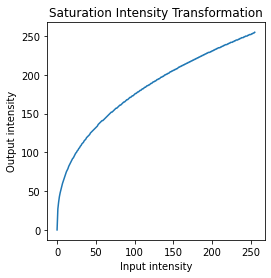

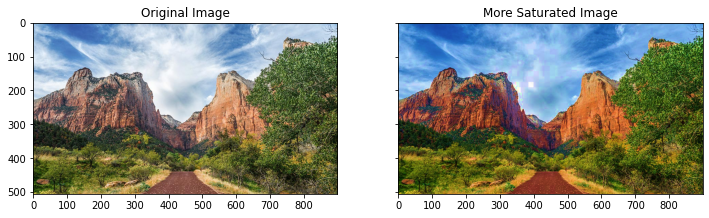

In [129]:
f = cv.imread(r'Images/zion_pass.jpg')
assert f is not None

s = 0.4
t = np.array([(p/255)**s*255 for p in range(0,256)], dtype = np.uint8)
g = inc_saturation(f, transform = t, value = 0)

cv.imshow('Zion Pass', f)
cv.waitKey(0)
cv.destroyAllWindows()

cv.imshow('Zion Pass', g)
cv.waitKey(0)
cv.destroyAllWindows()

fig1, ax = plt.subplots(figsize=(4,4))
ax.plot(t)
ax.set_title('Saturation Intensity Transformation')
ax.set_xlabel('Input intensity')
ax.set_ylabel('Output intensity')
ax.set_aspect('equal')

fig2, axs = plt.subplots(1,2, figsize=(12,4), sharey = True)
f_rgb = cv.cvtColor(f, cv.COLOR_BGR2RGB)
g_rgb = cv.cvtColor(g, cv.COLOR_BGR2RGB)

axs[0].imshow(f_rgb)
axs[0].set_title('Original Image')
axs[1].imshow(g_rgb)
axs[1].set_title("More Saturated Image")
plt.show()


### b)

In [132]:
def inc_hue(im, transform = None, value=25):
    hsv = cv.cvtColor(im, cv.COLOR_BGR2HSV)
    h, s, v = cv.split(hsv)

    if transform is not None:
        h = cv.LUT(h, transform)
    else:
        h = cv.add(h, value)

    hsv_new = cv.merge((h, s, v))
    im = cv.cvtColor(hsv_new, cv.COLOR_HSV2BGR)
    return im

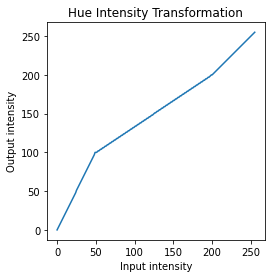

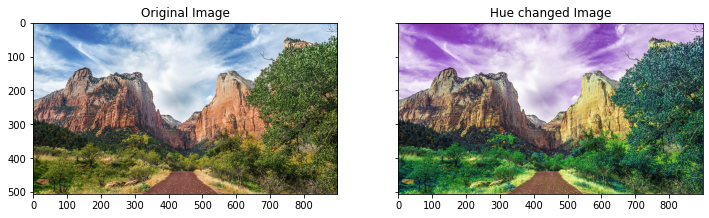

In [135]:
t1 = np.linspace(0, 100, 50)
t2 = np.linspace(100, 200, 150)
t3 = np.linspace(200, 255, 56)

t = np.concatenate((t1, t2, t3), axis = 0).astype(np.uint8)
assert len(t) == 256

g = cv.LUT(f, t)
im = cv.cvtColor(g, cv.COLOR_BGR2RGB)

g = inc_hue(f, transform = t, value = 0)

cv.imshow('Zion Pass', f)
cv.waitKey(0)
cv.destroyAllWindows()

cv.imshow('Zion Pass', g)
cv.waitKey(0)
cv.destroyAllWindows()

fig1, ax = plt.subplots(figsize=(4,4))
ax.plot(t)
ax.set_title('Hue Intensity Transformation')
ax.set_xlabel('Input intensity')
ax.set_ylabel('Output intensity')
ax.set_aspect('equal')

fig2, axs = plt.subplots(1,2, figsize=(12,4), sharey = True)
f_rgb = cv.cvtColor(f, cv.COLOR_BGR2RGB)
g_rgb = cv.cvtColor(g, cv.COLOR_BGR2RGB)

axs[0].imshow(f_rgb)
axs[0].set_title('Original Image')
axs[1].imshow(g_rgb)
axs[1].set_title("Hue changed Image")
plt.show()